<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<AxesSubplot:ylabel='MEDV'>

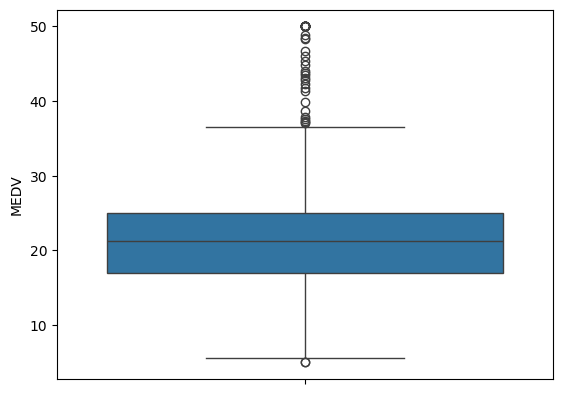

In [11]:
sns.boxplot(boston_df['MEDV'])

<BarContainer object of 2 artists>

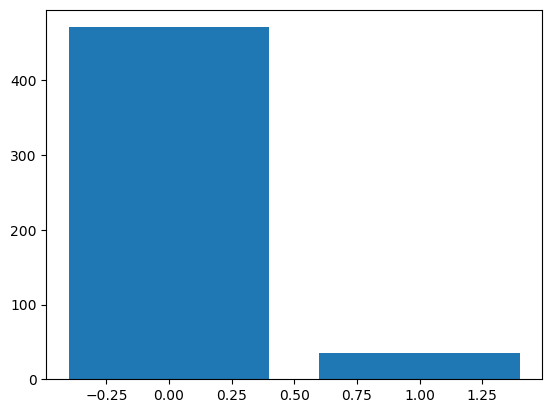

In [12]:
dg = [boston_df['CHAS'].sum(),boston_df['CHAS'].count()-boston_df['CHAS'].sum()]
dl = [1,0]
pyplot.bar(dl,dg)

<AxesSubplot:xlabel='MEDV', ylabel='AGE bucket'>

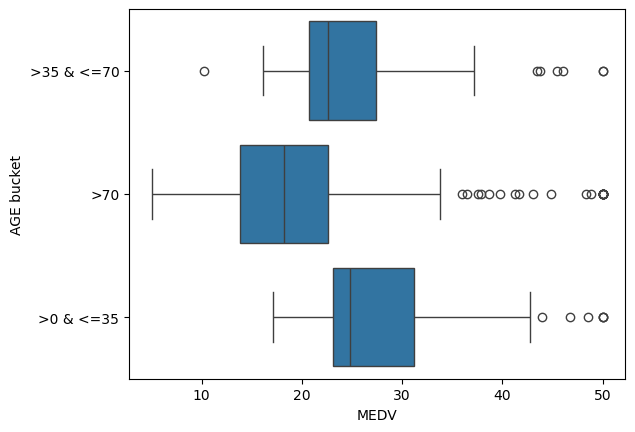

In [13]:
conditions = [
    (boston_df['AGE'] < 0),
    (boston_df['AGE'] >= 0) & (boston_df['AGE'] <= 35),
    (boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70),
    (boston_df['AGE']> 70)
    ]
values = ['<0', '>0 & <=35', '>35 & <=70', '>70']
boston_df['AGE bucket'] = np.select(conditions, values)
sns.boxplot(x=boston_df['MEDV'],y=boston_df['AGE bucket'])

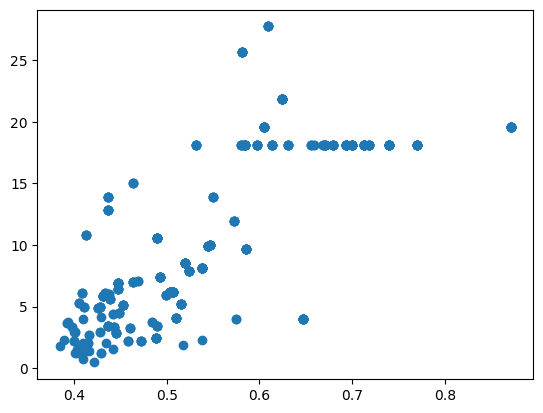

In [14]:
pyplot.scatter(boston_df['NOX'],boston_df['INDUS'])

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

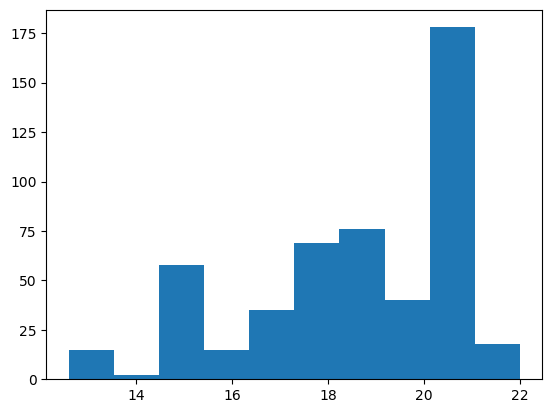

In [15]:
pyplot.hist(boston_df['PTRATIO'])

In [16]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
from scipy import stats
stats.ttest_ind(boston_df['CHAS'],boston_df['MEDV'])
#as the p-value is higher  then alpha then we have to reject the null hypothesis. Means are different

TtestResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

In [21]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
from scipy.stats import f_oneway
f_oneway(boston_df['MEDV'],boston_df['AGE'])
#as the p-value is higher  then alpha then we have to reject the null hypothesis. Means are different

F_onewayResult(statistic=1223.1740271875933, pvalue=3.20946197250671e-176)

In [22]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
from scipy import stats
stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
#as the p-value is higher  then alpha then we have to reject the null hypothesis. there is no relation between NOX and INDUS

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [27]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(boston_df[['DIS']],boston_df['MEDV'])
model.score(boston_df[['DIS']],boston_df['MEDV'])
#there is no additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

0.062464372121782796